# `waterfall` 플롯

이 노트북은 `shap.plots.waterfall` 함수를 사용하는 방법을 보여주기 위해(그리고 문서화하기 위해) 고안되었습니다. 이 노트북은 고전적인 UCI 성인 소득 데이터 집합(90년대에 \\$5만 달러 이상을 버는지 예측하는 분류 작업)에 대해 훈련된 XGBoost 모델을 사용합니다.

In [1]:
import xgboost
import shap

#  XGBoost 모델 훈련
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

#  SHAP 값 계산
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 99%|===================| 32356/32561 [00:56<00:00]        

폭포수형 플롯은 개별 예측에 대한 설명을 표시하도록 설계되었으므로 설명 개체의 단일 행을 입력으로 예상합니다. 폭포수형 플롯의 맨 아래는 모델 출력의 예상 값으로 시작하며, 각 행은 각 특징의 양(빨간색) 또는 음(파란색) 기여도가 배경 데이터 집합에 대한 예상 모델 출력에서 이 예측에 대한 모델 출력으로 값을 이동시키는 방법을 보여줍니다.

아래는 첫 번째 설명을 플롯한 예입니다. 기본적으로 SHAP은 로지스틱 링크 함수 이전에 마진 출력의 관점에서 XGBoost 분류기 모델을 설명합니다. 즉, X축의 단위는 로그 확률 단위이므로 음수 값은 그 사람이 연간 5만 달러 이상의 수익을 올릴 확률이 0.5 미만임을 의미합니다. 기능 이름 앞의 회색 텍스트는 이 샘플에 대한 각 기능의 값을 나타냅니다.폭포수형 플롯은 개별 예측에 대한 설명을 표시하도록 설계되었으므로 설명 개체의 단일 행을 입력으로 예상합니다. 

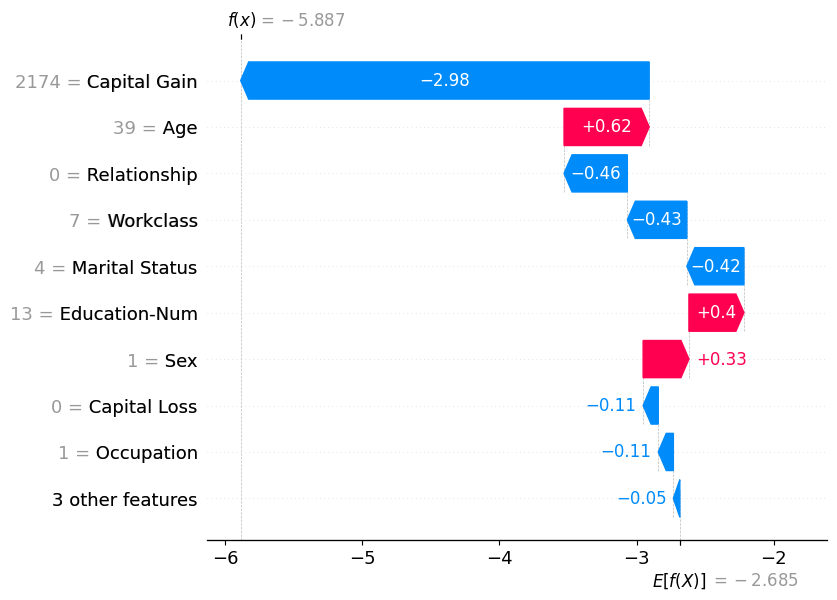

In [2]:
shap.plots.waterfall(shap_values[0])

위의 설명에서는 영향력이 가장 적은 세 가지 기능을 단일 용어로 축소하여 플롯에 10개 이상의 행이 표시되지 않도록 했습니다. 기본 제한인 10행은 `max_display` 인수를 사용하여 변경할 수 있습니다:

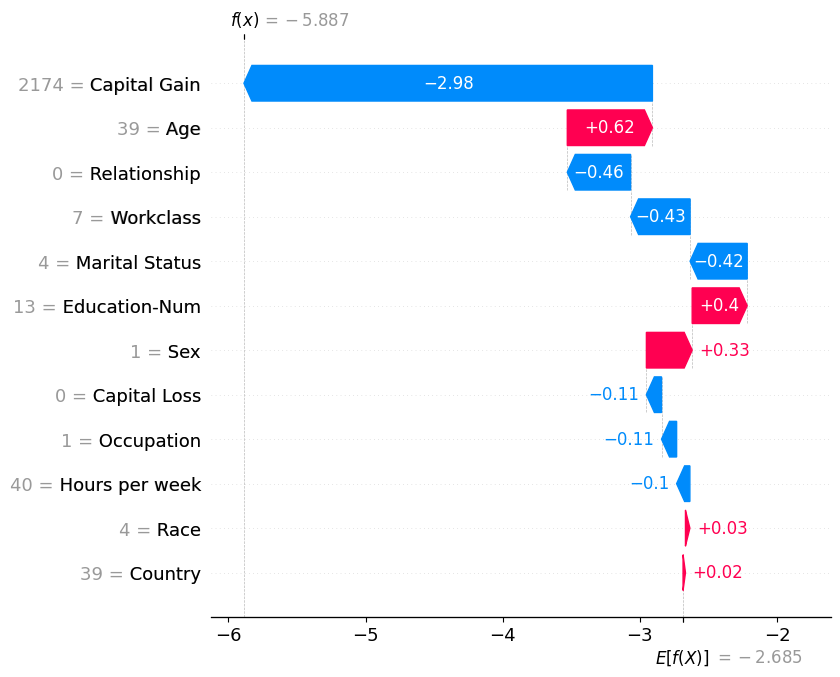

In [3]:
shap.plots.waterfall(shap_values[0], max_display=20)

2,174달러의 자본 이득이 발생하면 이 사람이 연간 5만 달러 이상의 수익을 올릴 것으로 예상되는 확률이 급격히 줄어든다는 점이 흥미롭습니다. `폭포형` 플롯은 단일 샘플의 데이터만 보여주기 때문에 자본 이득 변화의 영향을 볼 수 없습니다. 이를 확인하기 위해 '분산형' 플롯을 사용할 수 있는데, 이 플롯은 자본 이득의 낮은 값이 자본 이득이 전혀 없는 것보다 소득을 더 부정적으로 예측하는 것을 보여줍니다. 왜 이런 일이 발생하는지 알아보려면 데이터를 더 자세히 분석해야 하며, 모델 구축 과정의 불확실성을 정량화하기 위해 부트스트랩 리샘플을 사용하여 모델을 더 신중하게 훈련해야 합니다.2,174달러의 자본 이득이 발생하면 이 사람이 연간 5만 달러 이상의 수익을 올릴 것으로 예상되는 확률이 급격히 줄어든다는 점이 흥미롭습니다. `폭포형` 플롯은 단일 샘플의 데이터만 보여주기 때문에 자본 이득 변화의 영향을 볼 수 없습니다. 이를 확인하기 위해 ``분산형`플롯을 사용할 수 있는데, 이 플롯은 자본 이득의 낮은 값이 자본 이득이 전혀 없는 것보다 소득을 더 부정적으로 예측하는 것을 보여줍니다. 왜 이런 일이 발생하는지 알아보려면 데이터를 더 자세히 분석해야 하며, 모델 구축 과정의 불확실성을 정량화하기 위해 부트스트랩 리샘플을 사용하여 모델을 더 신중하게 훈련해야 합니다.

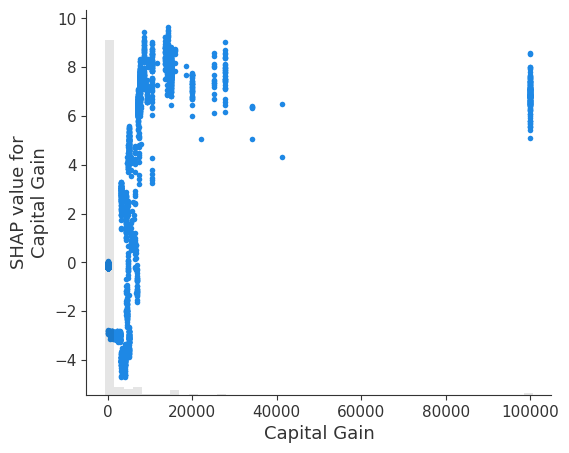

In [4]:
shap.plots.scatter(shap_values[:,"Capital Gain"])

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 